<a href="https://colab.research.google.com/github/mohameddhamed/data-science-intro/blob/main/Task1_Load_Inspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CELL 1 in Task1_Load_Inspect notebook
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set project folder path
PROJECT_FOLDER = '/content/drive/MyDrive/ML_Attack_Classifier'
print(f"✓ Connected to project folder")

Mounted at /content/drive
✓ Connected to project folder


In [2]:
# CELL 2 in Task1_Load_Inspect notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Drive
data = pd.read_pickle(f'{PROJECT_FOLDER}/dataset_full.pkl')
print("✓ Dataset loaded successfully")
print(f"Shape: {data.shape}")

✓ Dataset loaded successfully
Shape: (2830743, 79)


✓ Fixed column names

DATASET SUMMARY
Shape: (2830743, 79)
Number of samples: 2,830,743
Number of features: 79

------------------------------------------------------------
COLUMNS:
------------------------------------------------------------
 1. Destination Port
 2. Flow Duration
 3. Total Fwd Packets
 4. Total Backward Packets
 5. Total Length of Fwd Packets
 6. Total Length of Bwd Packets
 7. Fwd Packet Length Max
 8. Fwd Packet Length Min
 9. Fwd Packet Length Mean
10. Fwd Packet Length Std
11. Bwd Packet Length Max
12. Bwd Packet Length Min
13. Bwd Packet Length Mean
14. Bwd Packet Length Std
15. Flow Bytes/s
16. Flow Packets/s
17. Flow IAT Mean
18. Flow IAT Std
19. Flow IAT Max
20. Flow IAT Min
21. Fwd IAT Total
22. Fwd IAT Mean
23. Fwd IAT Std
24. Fwd IAT Max
25. Fwd IAT Min
26. Bwd IAT Total
27. Bwd IAT Mean
28. Bwd IAT Std
29. Bwd IAT Max
30. Bwd IAT Min
31. Fwd PSH Flags
32. Bwd PSH Flags
33. Fwd URG Flags
34. Bwd URG Flags
35. Fwd Header Length
36. Bwd Header Length
37. Fwd 

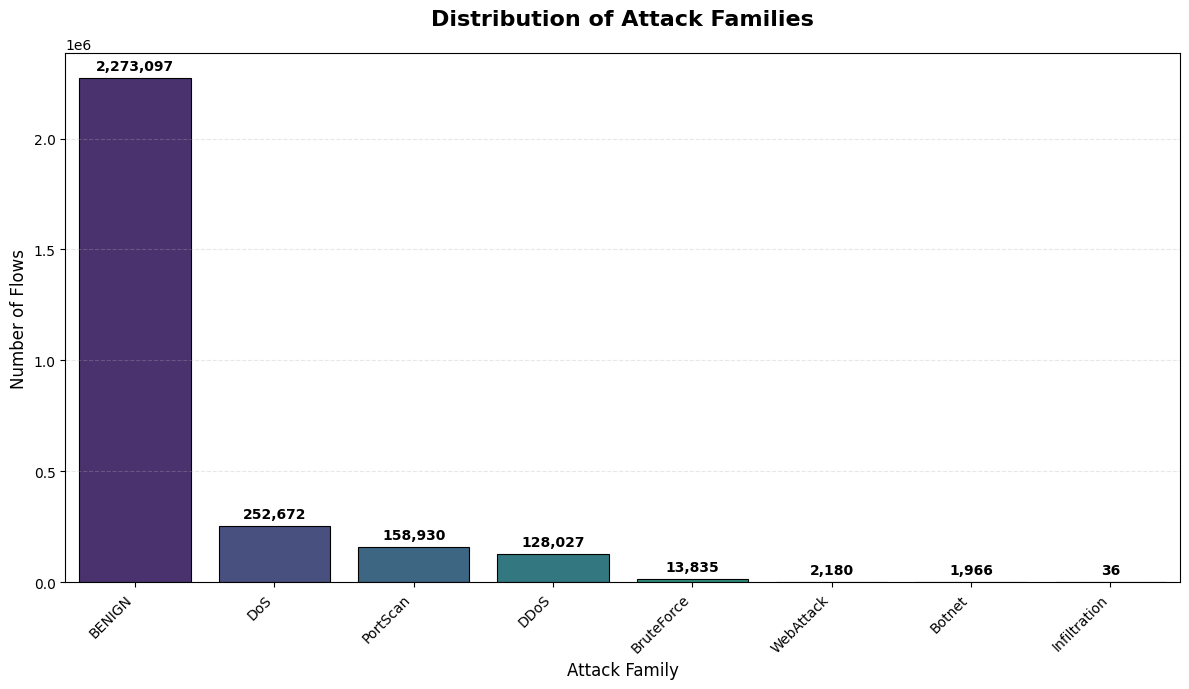


✓ Saved processed dataset: full_dataset_with_families.pkl

TASK 1 DELIVERABLES COMPLETED ✓
✓ Dataset loaded and concatenated
✓ Shape displayed
✓ Features listed
✓ Label distribution analyzed
✓ Attack families created
✓ Distribution plot saved


In [3]:
# Task 1 — Load and Inspect the Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset (you already created this in setup)
# data = pd.read_pickle('dataset_full.pkl')
# print("✓ Loaded dataset successfully")
# data already loaded above

# Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()
print("✓ Fixed column names")

# ===== DATASET INSPECTION =====
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Shape: {data.shape}")
print(f"Number of samples: {data.shape[0]:,}")
print(f"Number of features: {data.shape[1]}")

print("\n" + "-"*60)
print("COLUMNS:")
print("-"*60)
for i, col in enumerate(data.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "-"*60)
print("FIRST 5 ROWS:")
print("-"*60)
print(data.head())

print("\n" + "-"*60)
print("RAW LABEL COUNTS (Top 20):")
print("-"*60)
raw_counts = data["Label"].value_counts().head(20)
print(raw_counts)

# ===== LABEL MAPPING TO ATTACK FAMILIES =====
print("\n" + "="*60)
print("CREATING ATTACK FAMILIES")
print("="*60)

label_mapping = {
    "BENIGN": "BENIGN",
    # DoS family
    "DoS Hulk": "DoS",
    "DoS GoldenEye": "DoS",
    "DoS slowloris": "DoS",
    "DoS Slowhttptest": "DoS",
    "Heartbleed": "DoS",
    # DDoS
    "DDoS": "DDoS",
    # PortScan
    "PortScan": "PortScan",
    # Web attacks - Fixed encoding issues
    "Web Attack � Brute Force": "WebAttack",
    "Web Attack � XSS": "WebAttack",
    "Web Attack � Sql Injection": "WebAttack",
    # Also handle proper encoding
    "Web Attack - Brute Force": "WebAttack",
    "Web Attack - XSS": "WebAttack",
    "Web Attack - Sql Injection": "WebAttack",
    # Brute force
    "FTP-Patator": "BruteForce",
    "SSH-Patator": "BruteForce",
    # Botnet / Infiltration
    "Bot": "Botnet",
    "Infiltration": "Infiltration",
}

# Apply mapping
data["Label_family"] = data["Label"].map(label_mapping)

# Check for unmapped labels
missing_count = data["Label_family"].isna().sum()
print(f"\nMissing mappings: {missing_count}")

if missing_count > 0:
    print("\n⚠ WARNING: Found unmapped labels!")
    unmapped_labels = data[data["Label_family"].isna()]["Label"].unique()
    print("Unmapped labels:")
    for label in unmapped_labels:
        count = (data["Label"] == label).sum()
        print(f"  - {label}: {count:,} samples")

    # Optionally map unmapped to 'Other'
    data["Label_family"].fillna("Other", inplace=True)
    print("\n✓ Mapped unmapped labels to 'Other'")

print("\n" + "-"*60)
print("FINAL ATTACK FAMILY COUNTS:")
print("-"*60)
family_counts = data["Label_family"].value_counts()
print(family_counts)
print(f"\nTotal families: {len(family_counts)}")

# ===== VISUALIZATION =====
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Create figure with better styling
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=family_counts.index,
    y=family_counts.values,
    hue=family_counts.index,
    palette="viridis",
    legend=False,
)

plt.title("Distribution of Attack Families", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Number of Flows", fontsize=12)
plt.xlabel("Attack Family", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add borders to bars
for patch in ax.patches:
    patch.set_edgecolor("black")
    patch.set_linewidth(0.8)

# Add value labels on top of bars
for i, v in enumerate(family_counts.values):
    ax.text(i, v + max(family_counts.values)*0.01,
            f"{v:,}",
            ha="center", va="bottom", fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("label_distribution.png", dpi=300, bbox_inches='tight')
print("✓ Saved: label_distribution.png")
plt.show()

# ===== SAVE PROCESSED DATASET =====
data.to_pickle("full_dataset_with_families.pkl")
print("\n✓ Saved processed dataset: full_dataset_with_families.pkl")

# ===== TASK 1 SUMMARY =====
print("\n" + "="*60)
print("TASK 1 DELIVERABLES COMPLETED ✓")
print("="*60)
print("✓ Dataset loaded and concatenated")
print("✓ Shape displayed")
print("✓ Features listed")
print("✓ Label distribution analyzed")
print("✓ Attack families created")
print("✓ Distribution plot saved")
print("="*60)

In [4]:
# Add this at the END of Task 1 (last cell)
# Save processed dataset with attack families to Google Drive
data.to_pickle(f'{PROJECT_FOLDER}/full_dataset_with_families.pkl')
print("✓ Processed dataset saved to Google Drive!")

# Also save the plot
import shutil
shutil.copy('label_distribution.png', f'{PROJECT_FOLDER}/label_distribution.png')
print("✓ Plot saved to Google Drive!")

✓ Processed dataset saved to Google Drive!
✓ Plot saved to Google Drive!
